Silakan unggah gambar Anda


Saving harimau.jpeg to harimau (1).jpeg


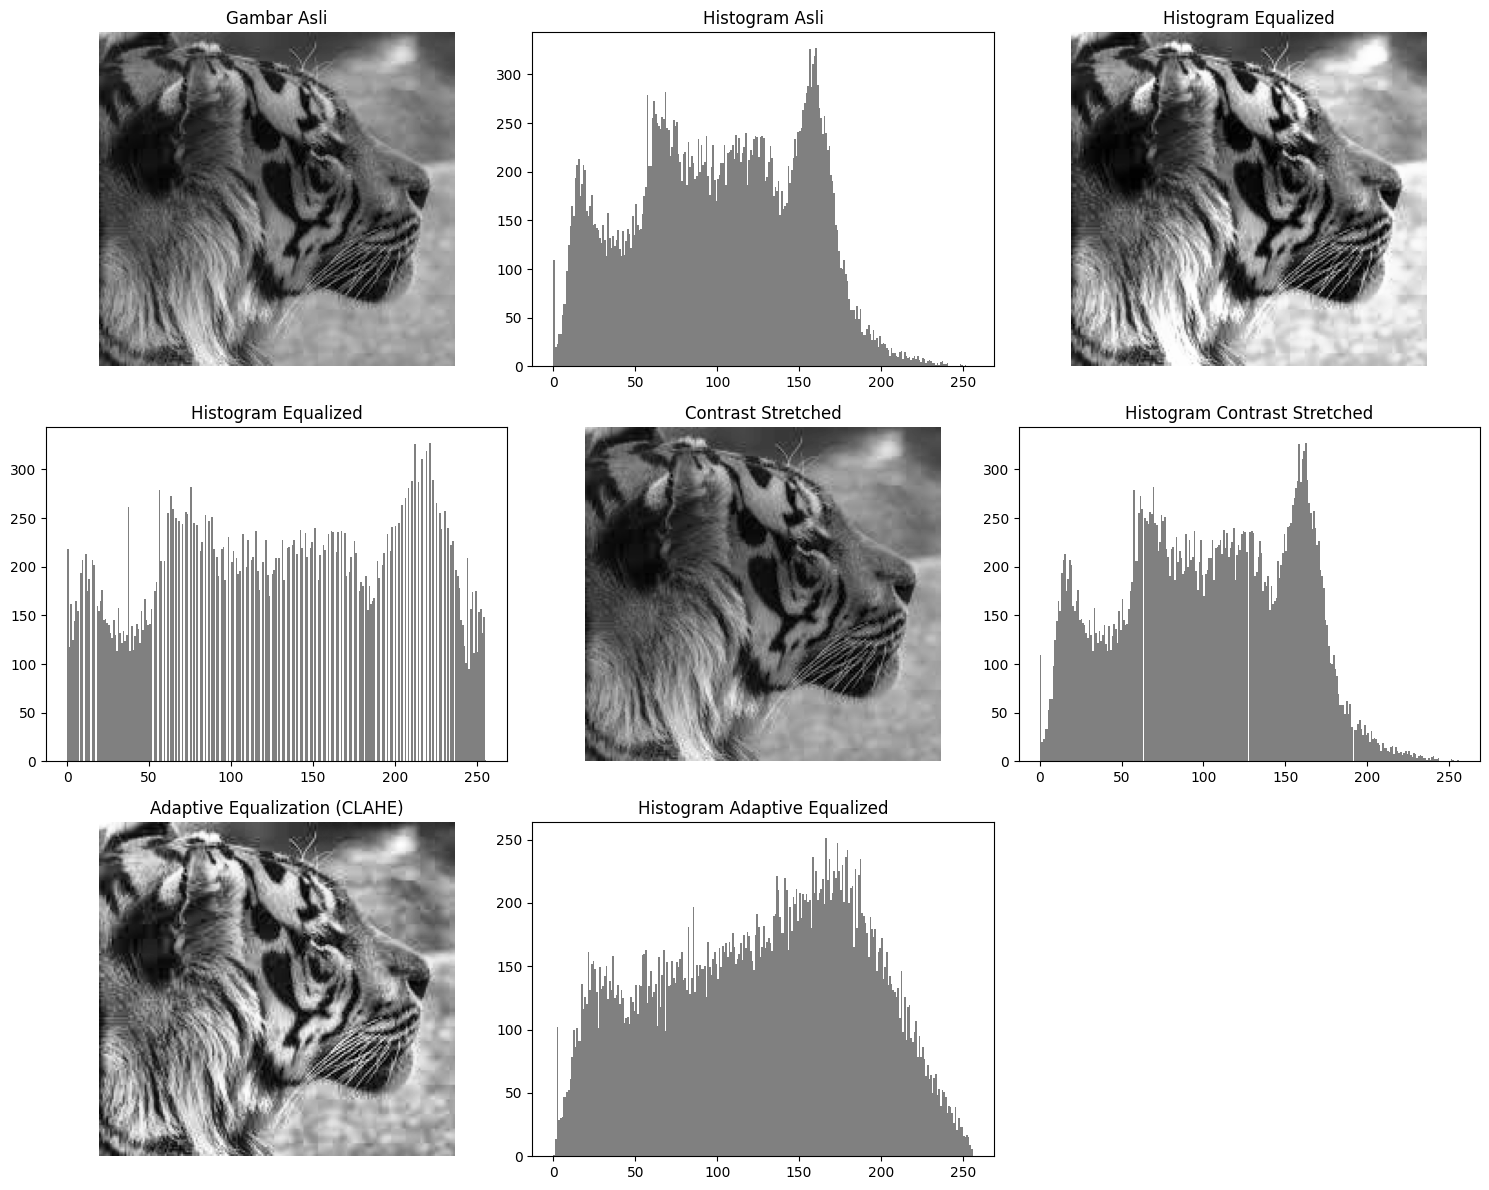

Gambar hasil Histogram Equalization disimpan sebagai: equalized_image.png
Gambar hasil Contrast Stretching disimpan sebagai: stretched_image.png
Gambar hasil Adaptive Equalization (CLAHE) disimpan sebagai: adaptive_equalized_image.png


In [2]:
# Import library
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 1. Unggah gambar
print("Silakan unggah gambar Anda")
uploaded = files.upload()

# Ambil nama file yang diunggah
image_name = list(uploaded.keys())[0]

# 2. Membaca gambar
# Baca sebagai grayscale
img = cv2.imread(image_name, cv2.IMREAD_GRAYSCALE)

# Tampilkan gambar asli
plt.figure(figsize=(15, 12))

# Gambar Asli
plt.subplot(3, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

# Histogram Asli
plt.subplot(3, 3, 2)
plt.hist(img.flatten(), bins=256, range=[0, 256], color='gray')
plt.title('Histogram Asli')

# =======================================================
# 3. Histogram Equalization
# =======================================================

# Menghitung histogram dan distribusi kumulatif
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
img_equalized = cdf[img]

# Gambar Histogram Equalized
plt.subplot(3, 3, 3)
plt.imshow(img_equalized, cmap='gray')
plt.title('Histogram Equalized')
plt.axis('off')

# Histogram Equalized
plt.subplot(3, 3, 4)
plt.hist(img_equalized.flatten(), bins=256, range=[0, 256], color='gray')
plt.title('Histogram Equalized')

# =======================================================
# 4. Contrast Stretching
# =======================================================

# Mendapatkan nilai minimum dan maksimum
min_val = np.min(img)
max_val = np.max(img)
img_stretched = ((img - min_val) / (max_val - min_val) * 255).astype(np.uint8)

# Gambar Contrast Stretched
plt.subplot(3, 3, 5)
plt.imshow(img_stretched, cmap='gray')
plt.title('Contrast Stretched')
plt.axis('off')

# Histogram Contrast Stretched
plt.subplot(3, 3, 6)
plt.hist(img_stretched.flatten(), bins=256, range=[0, 256], color='gray')
plt.title('Histogram Contrast Stretched')

# =======================================================
# 5. Adaptive Equalization (CLAHE)
# =======================================================

# Membuat objek CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
img_adaptive_equalized = clahe.apply(img)

# Gambar Adaptive Equalized
plt.subplot(3, 3, 7)
plt.imshow(img_adaptive_equalized, cmap='gray')
plt.title('Adaptive Equalization (CLAHE)')
plt.axis('off')

# Histogram Adaptive Equalized
plt.subplot(3, 3, 8)
plt.hist(img_adaptive_equalized.flatten(), bins=256, range=[0, 256], color='gray')
plt.title('Histogram Adaptive Equalized')

# =======================================================
# 6. Menyimpan dan Mengunduh Hasil
# =======================================================

# Menyimpan hasil
output_equalized = "equalized_image.png"
output_stretched = "stretched_image.png"
output_adaptive_equalized = "adaptive_equalized_image.png"

cv2.imwrite(output_equalized, img_equalized)
cv2.imwrite(output_stretched, img_stretched)
cv2.imwrite(output_adaptive_equalized, img_adaptive_equalized)

plt.tight_layout()
plt.show()

# Unduh hasil
print(f"Gambar hasil Histogram Equalization disimpan sebagai: {output_equalized}")
print(f"Gambar hasil Contrast Stretching disimpan sebagai: {output_stretched}")
print(f"Gambar hasil Adaptive Equalization (CLAHE) disimpan sebagai: {output_adaptive_equalized}")